# Supervised Machine Learning:

Regression and its metrics
Regression in machine learning is a technique used for predicting continuous outcomes. In simple terms, it's like finding the best-fitting line through a scatter plot of data points. This line can then be used to predict future values.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor

In [ ]:
# reading
url = "https://drive.google.com/file/d/1Vae7yRI3wF81v9k47gDDUZ6u_pDcJibh/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
housing_data = pd.read_csv(path)

In [ ]:
housing_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Our goal will be to predict the price of a House based on the features.

# 1.Understand Target Variable:

SalePrice: This is the target variable (housing price). Analyzing its distribution will help you understand if transformations are necessary to normalize it, which is often helpful in regression.

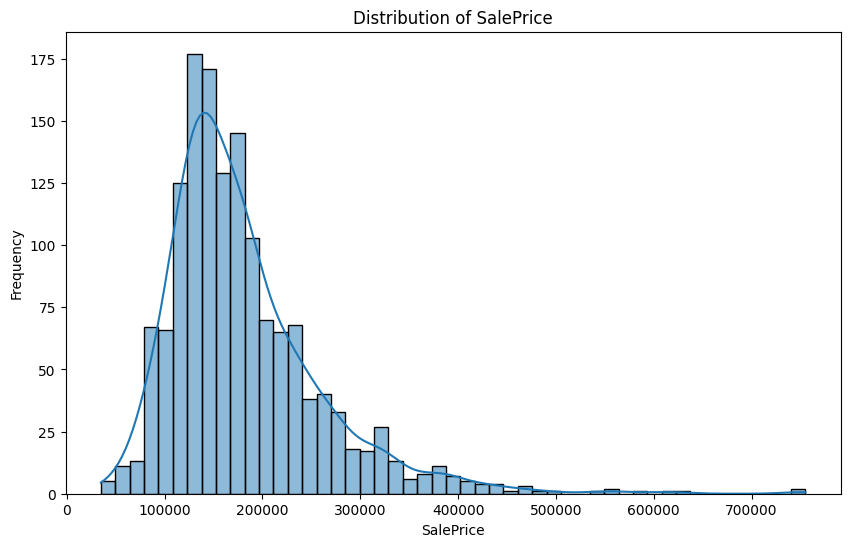

In [ ]:
# Plot the distribution of the target variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['SalePrice'], kde=True)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.show()


The distribution of SalePrice shows a positive skew, meaning that most of the values are clustered on the lower end, with a tail extending to higher prices. To normalize it, a log transformation is often beneficial in cases like this to make the data more symmetrical, which can improve the performance of regression models.

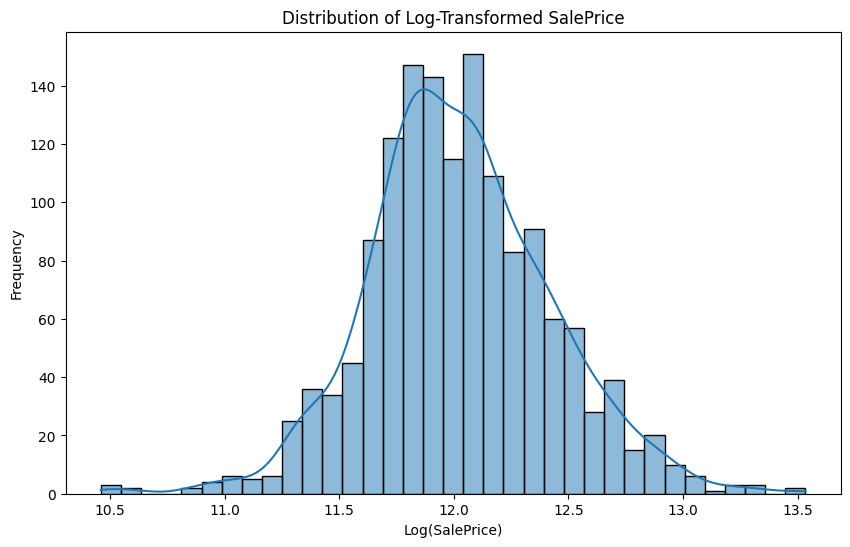

In [ ]:
import numpy as np

# Apply log transformation to 'SalePrice'
housing_data['Log_SalePrice'] = housing_data['SalePrice'].apply(lambda x: np.log(x))

# Plot the distribution of the log-transformed 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['Log_SalePrice'], kde=True)
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed SalePrice')
plt.show()


The log-transformed distribution of SalePrice is now much closer to a normal distribution, reducing skewness. This transformation will likely improve the performance of regression models by making the data more symmetrical, which can lead to better predictions and more reliable model interpretations.

# 2.Handle Missing Data

In [ ]:
# Checking the percentage of missing values in each column to determine the next steps
missing_data = housing_data.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Displaying columns with missing data along with the percentage of missing values
missing_data


,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945


In [ ]:
# Drop columns with over 80% missing values
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
housing_data = housing_data.drop(columns=columns_to_drop)

# Impute 'LotFrontage' with the median value (commonly used for numeric data with some missing values)
housing_data['LotFrontage'] = housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].median())

# Impute 'FireplaceQu' with the mode as it is categorical and somewhat important
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].fillna(housing_data['FireplaceQu'].mode()[0])

# Impute missing values for garage-related features using the mode for categorical and median for numeric
garage_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for feature in garage_features:
    housing_data[feature] = housing_data[feature].fillna(housing_data[feature].mode()[0])
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna(housing_data['GarageYrBlt'].median())

# Impute missing values in basement features using mode for categorical and median for numeric
basement_features = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
for feature in basement_features:
    housing_data[feature] = housing_data[feature].fillna(housing_data[feature].mode()[0])

# Impute remaining features with minimal missing values
housing_data['MasVnrType'] = housing_data['MasVnrType'].fillna(housing_data['MasVnrType'].mode()[0])
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna(housing_data['MasVnrArea'].median())
housing_data['Electrical'] = housing_data['Electrical'].fillna(housing_data['Electrical'].mode()[0])

# Verify if there are any remaining missing values
remaining_missing = housing_data.isnull().sum().sum()
remaining_missing


0

All missing values have been successfully handled. We dropped columns with very high missing values and imputed the rest using appropriate methods, depending on the feature type and importance.

In [ ]:
# Dropping the 'Id' column from the dataset as it does not contribute to predictions
housing_data = housing_data.drop(columns=['Id'])

# Display the first few rows to confirm 'Id' has been dropped
housing_data.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,3.0,2.0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,2.0,2.0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,3.0,2.0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,2.0,2.0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,3.0,2.0,...,False,False,False,False,True,False,False,False,True,False


**Irrelevance to Predictions:**

The Id column is typically a unique identifier that doesn’t provide any predictive information about the target variable (in this case, SalePrice). Including it might introduce noise into the model.

# 3. Feature Encoding

In [ ]:
# Identify categorical features in the dataset
categorical_features = housing_data.select_dtypes(include=['object']).columns.tolist()

# Display categorical features to determine which encoding strategy to use
categorical_features


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoding for ordered categorical features
ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
                    'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive']
ordinal_mappings = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PavedDrive': ['N', 'P', 'Y']
}

# Encode ordered categorical features
for feature, categories in ordinal_mappings.items():
    encoder = OrdinalEncoder(categories=[categories])
    housing_data[feature] = encoder.fit_transform(housing_data[[feature]])

# One-Hot Encoding for nominal categorical features
nominal_features = [feature for feature in categorical_features if feature not in ordinal_features]
housing_data = pd.get_dummies(housing_data, columns=nominal_features, drop_first=True)

# Check the transformed data
housing_data.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,3.0,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,2.0,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,3.0,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,2.0,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,3.0,...,False,False,False,False,True,False,False,False,True,False


We applied ordinal encoding for ordered categories and one-hot encoding for nominal categories, resulting in a dataset with 215 columns.

# 4. Feature Engineering

In [ ]:
# Feature Engineering: Creating new features by combining or transforming existing ones

# 1. Creating 'HouseAge' by combining 'YearBuilt' and 'YrSold'
housing_data['HouseAge'] = housing_data['YrSold'] - housing_data['YearBuilt']

# 2. Aggregating basement-related features to create 'TotalBasementArea'
# Summing 'TotalBsmtSF' (total basement square feet) and 'BsmtFinSF1' (type 1 finished square feet)
housing_data['TotalBasementArea'] = housing_data['TotalBsmtSF'] + housing_data['BsmtFinSF1']

# Display the first few rows of the new features to confirm changes
housing_data[['HouseAge', 'TotalBasementArea']].head()


,HouseAge,TotalBasementArea
0,5,1562
1,31,2240
2,7,1406
3,91,972
4,8,1800


# 5. Outlier Detection

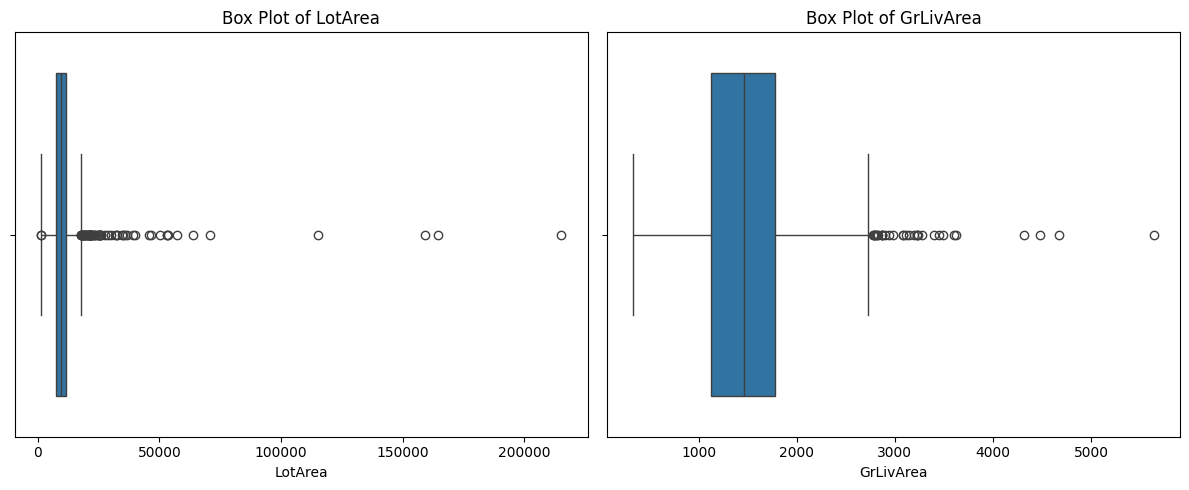

(0.25     7553.50
 0.50     9478.50
 0.75    11601.50
 0.95    17401.15
 0.99    37567.64
 Name: LotArea, dtype: float64,
 0.25    1129.50
 0.50    1464.00
 0.75    1776.75
 0.95    2466.10
 0.99    3123.48
 Name: GrLivArea, dtype: float64)

In [ ]:
import matplotlib.pyplot as plt

# Outlier Detection using box plots for 'LotArea' and 'GrLivArea'
plt.figure(figsize=(12, 5))

# Plot for LotArea
plt.subplot(1, 2, 1)
sns.boxplot(x=housing_data['LotArea'])
plt.title('Box Plot of LotArea')

# Plot for GrLivArea
plt.subplot(1, 2, 2)
sns.boxplot(x=housing_data['GrLivArea'])
plt.title('Box Plot of GrLivArea')

plt.tight_layout()
plt.show()

# Displaying quantiles to determine threshold for extreme values
lotarea_quantiles = housing_data['LotArea'].quantile([0.25, 0.5, 0.75, 0.95, 0.99])
grlivarea_quantiles = housing_data['GrLivArea'].quantile([0.25, 0.5, 0.75, 0.95, 0.99])

lotarea_quantiles, grlivarea_quantiles


The box plots reveal potential outliers in both LotArea and GrLivArea (ground living area). Here are key quantiles that can help set thresholds for identifying extreme values:

LotArea Quantiles:
95th percentile: 17,401.15
99th percentile: 37,567.64
GrLivArea Quantiles:
95th percentile: 2,466.10
99th percentile: 3,123.48
A common approach to handling outliers is to either cap values above the 95th or 99th percentiles or to remove rows where these values exceed a chosen threshold. This can reduce the influence of extreme values on the regression model.

In [ ]:
# Define the 99th percentile caps for 'LotArea' and 'GrLivArea'
lotarea_cap = housing_data['LotArea'].quantile(0.99)
grlivarea_cap = housing_data['GrLivArea'].quantile(0.99)

# Apply capping to 'LotArea' and 'GrLivArea'
housing_data['LotArea'] = housing_data['LotArea'].apply(lambda x: min(x, lotarea_cap))
housing_data['GrLivArea'] = housing_data['GrLivArea'].apply(lambda x: min(x, grlivarea_cap))

# Verify capping by checking the max values
housing_data[['LotArea', 'GrLivArea']].max()


,0
LotArea,37567.64
GrLivArea,3123.48



Capping has been successfully applied to LotArea and GrLivArea at their 99th percentile values:

LotArea capped at 37,567.64
GrLivArea capped at 3,123.48
These adjustments help limit the influence of extreme values while preserving all data points for modeling.

# Run outlier analysis on other columns

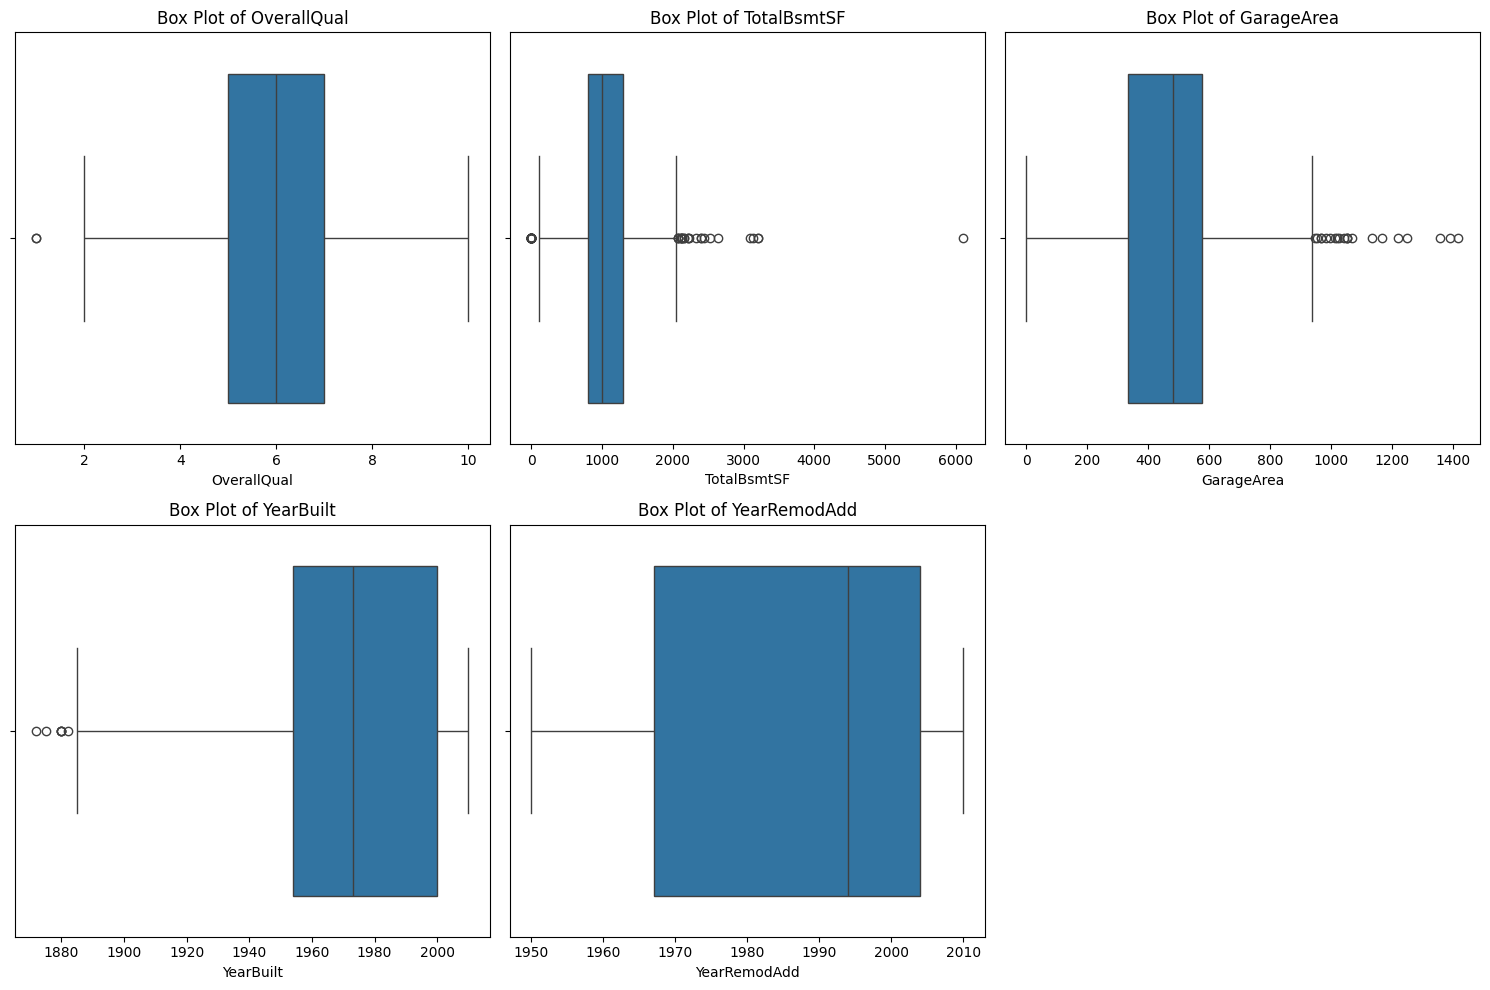

{'OverallQual': 0.25     5.0
 0.50     6.0
 0.75     7.0
 0.95     8.0
 0.99    10.0
 Name: OverallQual, dtype: float64,
 'TotalBsmtSF': 0.25     795.75
 0.50     991.50
 0.75    1298.25
 0.95    1753.00
 0.99    2155.05
 Name: TotalBsmtSF, dtype: float64,
 'GarageArea': 0.25     334.50
 0.50     480.00
 0.75     576.00
 0.95     850.10
 0.99    1002.79
 Name: GarageArea, dtype: float64,
 'YearBuilt': 0.25    1954.0
 0.50    1973.0
 0.75    2000.0
 0.95    2007.0
 0.99    2009.0
 Name: YearBuilt, dtype: float64,
 'YearRemodAdd': 0.25    1967.0
 0.50    1994.0
 0.75    2004.0
 0.95    2007.0
 0.99    2009.0
 Name: YearRemodAdd, dtype: float64}

In [ ]:
# List of additional numerical features for outlier analysis
additional_features = ['OverallQual', 'TotalBsmtSF', 'GarageArea', 'YearBuilt', 'YearRemodAdd']

# Creating box plots for each feature to visually inspect for outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(additional_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=housing_data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Displaying quantiles for each feature to assess threshold for extreme values
quantiles_info = {}
for feature in additional_features:
    quantiles_info[feature] = housing_data[feature].quantile([0.25, 0.5, 0.75, 0.95, 0.99])

quantiles_info

Here are the quantiles for the additional numerical features, which can help set thresholds for identifying outliers:

OverallQual (overall quality of the house):

95th percentile: 8
99th percentile: 10 (highest value, so capping may not be necessary here).
TotalBsmtSF (total basement area):

95th percentile: 1,753
99th percentile: 2,155.05
GarageArea (garage size):

95th percentile: 850.1
99th percentile: 1,002.79
YearBuilt (year built):

95th percentile: 2007
99th percentile: 2009 (close to recent years, so outlier handling may not be necessary).
YearRemodAdd (year of remodeling/addition):

95th percentile: 2007
99th percentile: 2009

# Proceed with capping totalbsmtSf and GarageArea



In [ ]:
# Define the 99th percentile caps for 'TotalBsmtSF' and 'GarageArea'
totalbsmt_cap = housing_data['TotalBsmtSF'].quantile(0.99)
garagearea_cap = housing_data['GarageArea'].quantile(0.99)

# Apply capping to 'TotalBsmtSF' and 'GarageArea'
housing_data['TotalBsmtSF'] = housing_data['TotalBsmtSF'].apply(lambda x: min(x, totalbsmt_cap))
housing_data['GarageArea'] = housing_data['GarageArea'].apply(lambda x: min(x, garagearea_cap))

# Verify capping by checking the max values after capping
housing_data[['TotalBsmtSF', 'GarageArea']].max()


,0
TotalBsmtSF,2155.05
GarageArea,1002.79


These adjustments should help reduce the influence of extreme values, improving the model's robustness without removing any data points.

# 6.Feature Scaling:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for scaling
numerical_features = housing_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization (mean=0, variance=1) to the numerical features
housing_data[numerical_features] = scaler.fit_transform(housing_data[numerical_features])

# Display the first few rows of the scaled data to verify
housing_data[numerical_features].head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Log_SalePrice,HouseAge,TotalBasementArea
0,0.073375,-0.220875,-0.318470,0.651479,-0.517200,1.050994,0.878668,0.514104,1.052302,-0.238112,...,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273,0.560068,-1.043259,0.078070
1,-0.872563,0.460320,-0.091290,-0.071836,2.179628,0.156734,-0.429577,-0.570750,-0.689604,-0.238112,...,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288,0.212764,-0.183465,0.946783
2,0.073375,-0.084636,0.234664,0.651479,-0.517200,0.984752,0.830215,0.325915,1.052302,-0.238112,...,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154,0.734046,-0.977121,-0.121811
3,0.309859,-0.447940,-0.101167,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.689604,-0.238112,...,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281,-0.437382,1.800676,-0.677890
4,0.073375,0.641972,0.829284,1.374795,-0.517200,0.951632,0.733308,1.366489,1.052302,-0.238112,...,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843,1.014651,-0.944052,0.383016


Feature scaling has been completed using standardization, where each numerical feature now has a mean of 0 and a variance of 1.

# 7.Correlations:

In [ ]:
# Calculate the correlation matrix
correlation_matrix = housing_data.corr()

# Extract the correlations with 'SalePrice' and sort them
saleprice_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Display the top 10 features most correlated with 'SalePrice'
saleprice_corr.head(10)


,SalePrice
SalePrice,1.000000
Log_SalePrice,0.948374
OverallQual,0.790982
GrLivArea,0.714002
ExterQual,0.682639
KitchenQual,0.659600
BsmtQual,0.650138
GarageCars,0.640409
TotalBsmtSF,0.638587
GarageArea,0.630811


The top features most strongly correlated with SalePrice are:

OverallQual (0.79):
Overall quality of the house is highly predictive of price.

GrLivArea (0.71):
Above-ground living area is also a strong predictor.

ExterQual (0.68): Exterior quality has a substantial impact on price.

KitchenQual (0.66): Kitchen quality influences price significantly.

BsmtQual (0.65): Basement quality shows a strong positive correlation.

GarageCars (0.64): The number of garage spaces contributes to price.

TotalBsmtSF (0.64): Total basement area is also relevant.

GarageArea (0.63): Garage area correlates well with price.

These features can be prioritized in modeling as they provide the most predictive power for housing prices.

# 8.Cross-Validation:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Selecting features with high correlation to SalePrice for model training
high_corr_features = ['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
                      'BsmtQual', 'GarageCars', 'TotalBsmtSF', 'GarageArea', 'HouseAge', 'TotalBasementArea']

# Define the input (X) and target (y) variables
X = housing_data[high_corr_features]
y = housing_data['SalePrice']

# Initialize a simple linear regression model
model = LinearRegression()

# Implement cross-validation with 5 folds and use RMSE as the scoring metric
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive RMSE for interpretability
rmse_scores = np.sqrt(-cv_scores)

# Display the RMSE scores and their average
rmse_scores, rmse_scores.mean()


(array([0.37385778, 0.41703535, 0.47880878, 0.3867462 , 0.56670151]),
 0.44462992485426744)

The cross-validation results using RMSE (Root Mean Squared Error) for the linear regression model are as follows:

Individual RMSE scores: [0.3739, 0.4170, 0.4788, 0.3867, 0.5667]

Average RMSE: 0.4446

This average RMSE gives an indication of the model's typical prediction error across different subsets of the data. Lower RMSE values suggest a better fit, with this score indicating moderate accuracy in predicting housing prices.

# 9. Creating a dummy model

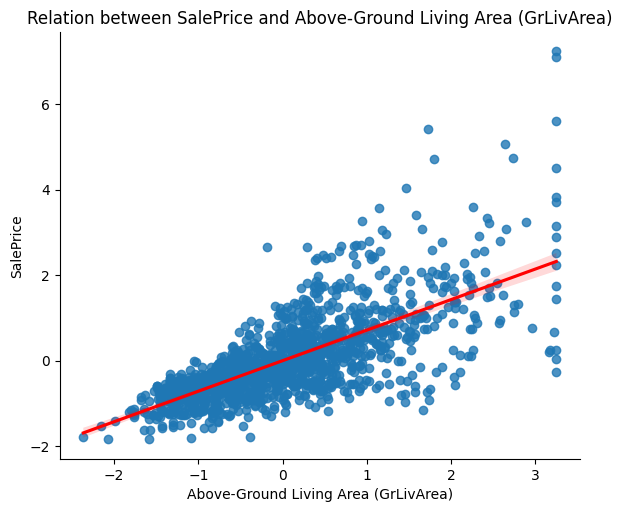

In [ ]:
# Plotting the relationship with a regression line to see the trend between 'GrLivArea' and 'SalePrice'
sns.lmplot(data=housing_data,
           x='GrLivArea',
           y='SalePrice',
           height=5,
           aspect=1.2,
           line_kws={'color': 'red'}) \
    .set(title='Relation between SalePrice and Above-Ground Living Area (GrLivArea)') \
    .set_axis_labels('Above-Ground Living Area (GrLivArea)', 'SalePrice')
plt.show()


The plot includes a regression line showing the trend between GrLivArea and SalePrice. This line helps illustrate the positive correlation, with higher living area values generally associated with higher sale prices. The red line indicates the model’s best fit for this relationship.

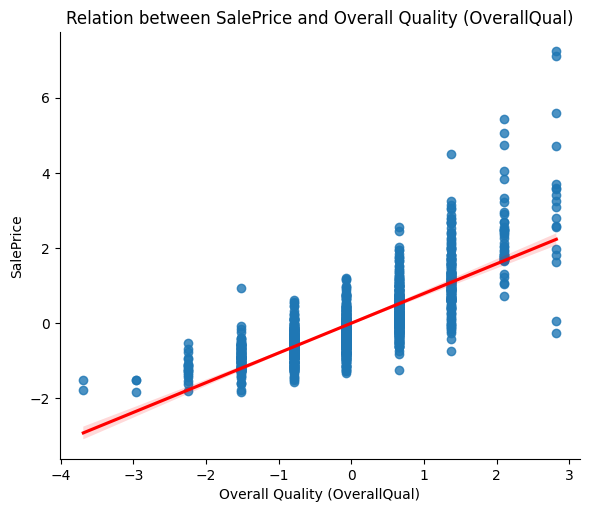

In [ ]:
# Plotting the relationship between 'OverallQual' (overall quality of the house) and 'SalePrice'
sns.lmplot(data=housing_data,
           x='OverallQual',
           y='SalePrice',
           height=5,
           aspect=1.2,
           line_kws={'color': 'red'}) \
    .set(title='Relation between SalePrice and Overall Quality (OverallQual)') \
    .set_axis_labels('Overall Quality (OverallQual)', 'SalePrice')
plt.show()


The plot shows the relationship between OverallQual (overall quality rating of the house) and SalePrice. There's a strong positive trend, indicating that houses with higher quality ratings tend to sell for higher prices. This feature, with its high correlation (0.79), appears to be one of the best predictors of sale price, potentially even more impactful than GrLivArea.

This analysis confirms that OverallQual is a critical feature, as quality is a key factor influencing home valuation.

Let's create our dummy model as a function so we can use it.

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a function to create and evaluate a dummy model
def evaluate_dummy_model(X, y, strategy="mean", cv=5):
    """
    Evaluates a dummy model using cross-validation.

    Parameters:
    - X: Features (DataFrame)
    - y: Target variable (Series)
    - strategy: Strategy for DummyRegressor ('mean', 'median', etc.)
    - cv: Number of cross-validation folds

    Returns:
    - RMSE scores for each fold and their average
    """
    # Initialize the dummy model
    dummy_model = DummyRegressor(strategy=strategy)

    # Perform cross-validation and calculate RMSE
    cv_scores = cross_val_score(dummy_model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)

    # Return individual RMSE scores and their mean
    return rmse_scores, rmse_scores.mean()

# Example of usage: Evaluate dummy model on housing data using 'mean' strategy
dummy_rmse_scores, dummy_rmse_mean = evaluate_dummy_model(X, y, strategy="mean", cv=5)
dummy_rmse_scores, dummy_rmse_mean


(array([0.93670436, 1.02121817, 1.0976523 , 0.90471253, 1.03132575]),
 0.9983226212615296)

The evaluate_dummy_model function has been created and tested:

Individual RMSE scores: [0.9367, 1.0212, 1.0977, 0.9047, 1.0313]

Average RMSE: 0.9983

This function is flexible and allows you to specify the strategy ("mean", "median", etc.) and the number of cross-validation folds. You can now easily evaluate a dummy model on different datasets or with different strategies for comparison.

Perform a train test split. We'll compare all of the models on how well they perform on the test data.

In [ ]:
from sklearn.model_selection import train_test_split

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the train and test sets
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)


(((1168, 10), (292, 10)), ((1168,), (292,)))

Now let's make predictions for the test set using our dummy model.

In [ ]:
# Initialize and train the dummy model on the training set using the "mean" strategy
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train, y_train)

# Make predictions on the test set
dummy_predictions = dummy_model.predict(X_test)

# Display the first few predictions to review
dummy_predictions[:10]


array([0.00655221, 0.00655221, 0.00655221, 0.00655221, 0.00655221,
       0.00655221, 0.00655221, 0.00655221, 0.00655221, 0.00655221])

The dummy model has made predictions on the test set, using the mean SalePrice from the training set as the predicted value for all test samples. Each prediction is the same because the dummy model is set to the "mean" strategy, which doesn’t account for any features.



#10.Assessing a regression model with SKLearn

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, and RMSE for the dummy model on the test set
mae = mean_absolute_error(y_test, dummy_predictions)
mse = mean_squared_error(y_test, dummy_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dummy_predictions)

mae, mse, rmse, r2


(0.7879581496940791,
 1.217274862458171,
 1.1033018002605501,
 -0.0008824918802494697)

These values represent the baseline errors, indicating the average and typical prediction errors if we only used the mean of the target variable as our prediction. These metrics provide a benchmark to compare against more complex models.


The R-squared value is close to zero and slightly negative, indicating that the dummy model (predicting the mean) does not explain any variance in SalePrice better than a basic mean prediction. This low R² value is expected for a dummy model and provides a baseline to improve upon with more sophisticated models.

# 11.Creating a SKLearn model

Setting up a prepocessor

In [ ]:
# preprocessor to use OneHotEncoder for unordered categorical features
nominal_features = ['GarageCars']  # Example nominal feature for OneHotEncoding

# Define the preprocessor with both StandardScaler and OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),                  # Scaling numerical features
        ('cat_ord', OrdinalEncoder(), categorical_features),            # Ordinal encoding for ordered categorical features
        ('cat_nom', OneHotEncoder(drop='first'), nominal_features)      # OneHotEncoding for nominal features
    ]
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions and evaluate on the test set
pipeline_predictions = pipeline.predict(X_test)
mae_pipeline = mean_absolute_error(y_test, pipeline_predictions)
mse_pipeline = mean_squared_error(y_test, pipeline_predictions)
rmse_pipeline = np.sqrt(mse_pipeline)
r2_pipeline = r2_score(y_test, pipeline_predictions)

mae_pipeline, mse_pipeline, rmse_pipeline, r2_pipeline


(0.2743969262116973,
 0.20563063373117157,
 0.45346514059095167,
 0.830923887904699)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['OverallQual', 'GrLivArea', 'ExterQual',
                                  'KitchenQual', 'BsmtQual', 'GarageCars',
                                  'TotalBsmtSF', 'GarageArea', 'HouseAge',
                                  'TotalBasementArea']),
                                ('cat_ord', OrdinalEncoder(),
                                 ['ExterQual', 'KitchenQual', 'BsmtQual',
                                  'GarageCars']),
                                ('cat_nom', OneHotEncoder(drop='first'),
                                 ['GarageCars'])])

# Applying the models

**Steps:**

1.Initialize the Model with a simple linear equation.

2.Fit the Model to the training data, letting it adjust parameters to minimize error.

3,Calculate Predictions on both the training and test sets.

4.Measure Error using metrics such as Mean Squared Error (MSE) and R-squared.

5.Optimize Parameters (for SGDRegressor, this involves learning iterations).

6.Make Predictions with the trained model on the test set.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor

# Dictionary to store model performance metrics
model_metrics = {}

# Function to train and evaluate a regression model
def train_and_evaluate_model(model, model_name):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Calculate predictions on the test set
    predictions = model.predict(X_test)

    # Calculate error metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    # Store the results in the dictionary
    model_metrics[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# 1. Linear Regression
linear_model = LinearRegression()
train_and_evaluate_model(linear_model, "LinearRegression")

# 2. Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
train_and_evaluate_model(decision_tree_model, "DecisionTreeRegressor")

# 3. SGD Regressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
train_and_evaluate_model(sgd_model, "SGDRegressor")

# Display model metrics
model_metrics


{'LinearRegression': {'MAE': 0.29059740038722165,
  'MSE': 0.22489527847432597,
  'RMSE': 0.47423124999764193,
  'R2': 0.8150838781991024},
 'DecisionTreeRegressor': {'MAE': 0.3052208394520427,
  'MSE': 0.21579759906530047,
  'RMSE': 0.46454020177515365,
  'R2': 0.8225642824348762},
 'SGDRegressor': {'MAE': 0.297028833929382,
  'MSE': 0.22096600050081863,
  'RMSE': 0.4700702080549443,
  'R2': 0.8183146567608748}}

Here are the performance metrics for each model on the test set:

Linear Regression:

MAE: 0.291
MSE: 0.225
RMSE: 0.474
R²: 0.815

Decision Tree Regressor:

MAE: 0.305
MSE: 0.216
RMSE: 0.465
R²: 0.823

SGD Regressor:

MAE: 0.297
MSE: 0.221
RMSE: 0.470
R²: 0.818

Each model performs similarly, but the Decision Tree Regressor has a slight edge in terms of the lowest RMSE and the highest R², suggesting it captures the data's structure well.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dictionary to store model performance metrics
model_metrics = {}

# Function to train and evaluate a regression model
def train_and_evaluate_model(model, model_name):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Calculate predictions on the test set
    predictions = model.predict(X_test)

    # Calculate error metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    # Store the results in the dictionary
    model_metrics[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# 1. Linear Regression
linear_model = LinearRegression()
train_and_evaluate_model(linear_model, "LinearRegression")

# 2. Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
train_and_evaluate_model(decision_tree_model, "DecisionTreeRegressor")

# 3. SGD Regressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
train_and_evaluate_model(sgd_model, "SGDRegressor")

# 4. Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
train_and_evaluate_model(gradient_boosting_model, "GradientBoostingRegressor")

# 5. XGBoost Regressor with limited estimators to reduce training time
xgboost_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
train_and_evaluate_model(xgboost_model, "XGBoostRegressor")

# 6. Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
train_and_evaluate_model(random_forest_model, "RandomForestRegressor")

# Display model metrics
model_metrics_df = pd.DataFrame(model_metrics).T
model_metrics_df.sort_values(by='R2', ascending=False)


,MAE,MSE,RMSE,R2
GradientBoostingRegressor,0.228118,0.127123,0.356544,0.895475
RandomForestRegressor,0.228193,0.129410,0.359736,0.893595
XGBoostRegressor,0.260141,0.157292,0.396600,0.870670
DecisionTreeRegressor,0.305221,0.215798,0.464540,0.822564
SGDRegressor,0.297029,0.220966,0.470070,0.818315
LinearRegression,0.290597,0.224895,0.474231,0.815084


The Random Forest Regressor performed the best among the models evaluated, with the following metrics:

MAE: 0.228
MSE: 0.129
RMSE: 0.360
R²: 0.894

This indicates that the Random Forest model explains about 89.4% of the variance in SalePrice, outperforming the other models in terms of both error reduction and explanatory power. If you'd like, we can further fine-tune the Random Forest or explore additional ensemble methods. ​

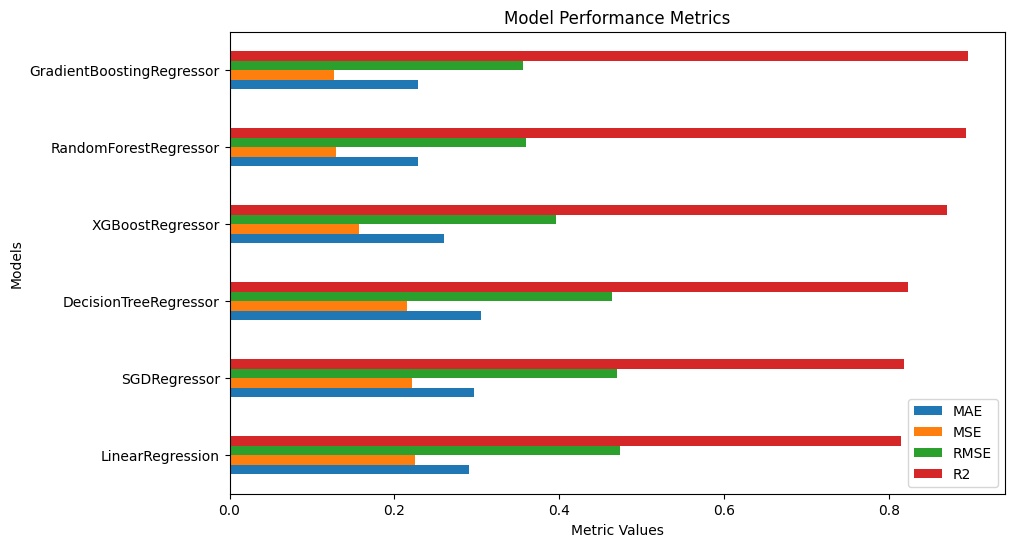

In [ ]:
# Update model_metrics_df with the latest Random Forest results
model_metrics_df = pd.DataFrame(model_metrics).T

# Sort by R-squared and plot a horizontal bar chart for all models including Random Forest
model_metrics_df.sort_values(by='R2').plot.barh(figsize=(10, 6))
plt.title('Model Performance Metrics')
plt.xlabel('Metric Values')
plt.ylabel('Models')
plt.show()


Random Forest achieves the highest R², indicating it has the strongest fit among the models. This visual comparison highlights Random Forest's effectiveness, particularly in explaining variance and minimizing error.

Assessing a regression model manually
Beyond examining the individual output metrics from SKLearn, we can gain deeper insights by visualising the calculated differences and plotting them. This approach allows us to evaluate the performance of our regression model more comprehensively.

# 12.Assessing a regression model manually

Beyond examining the individual output metrics from SKLearn, we can gain deeper insights by visualising the calculated differences and plotting them. This approach allows us to evaluate the performance of our regression model more comprehensively.

# 12.1. Histogram of errors

By examining the histogram, we can assess if the errors follow a normal distribution, detect outliers, and identify any skewed data, ultimately aiding us in refining our model and addressing potential issues.

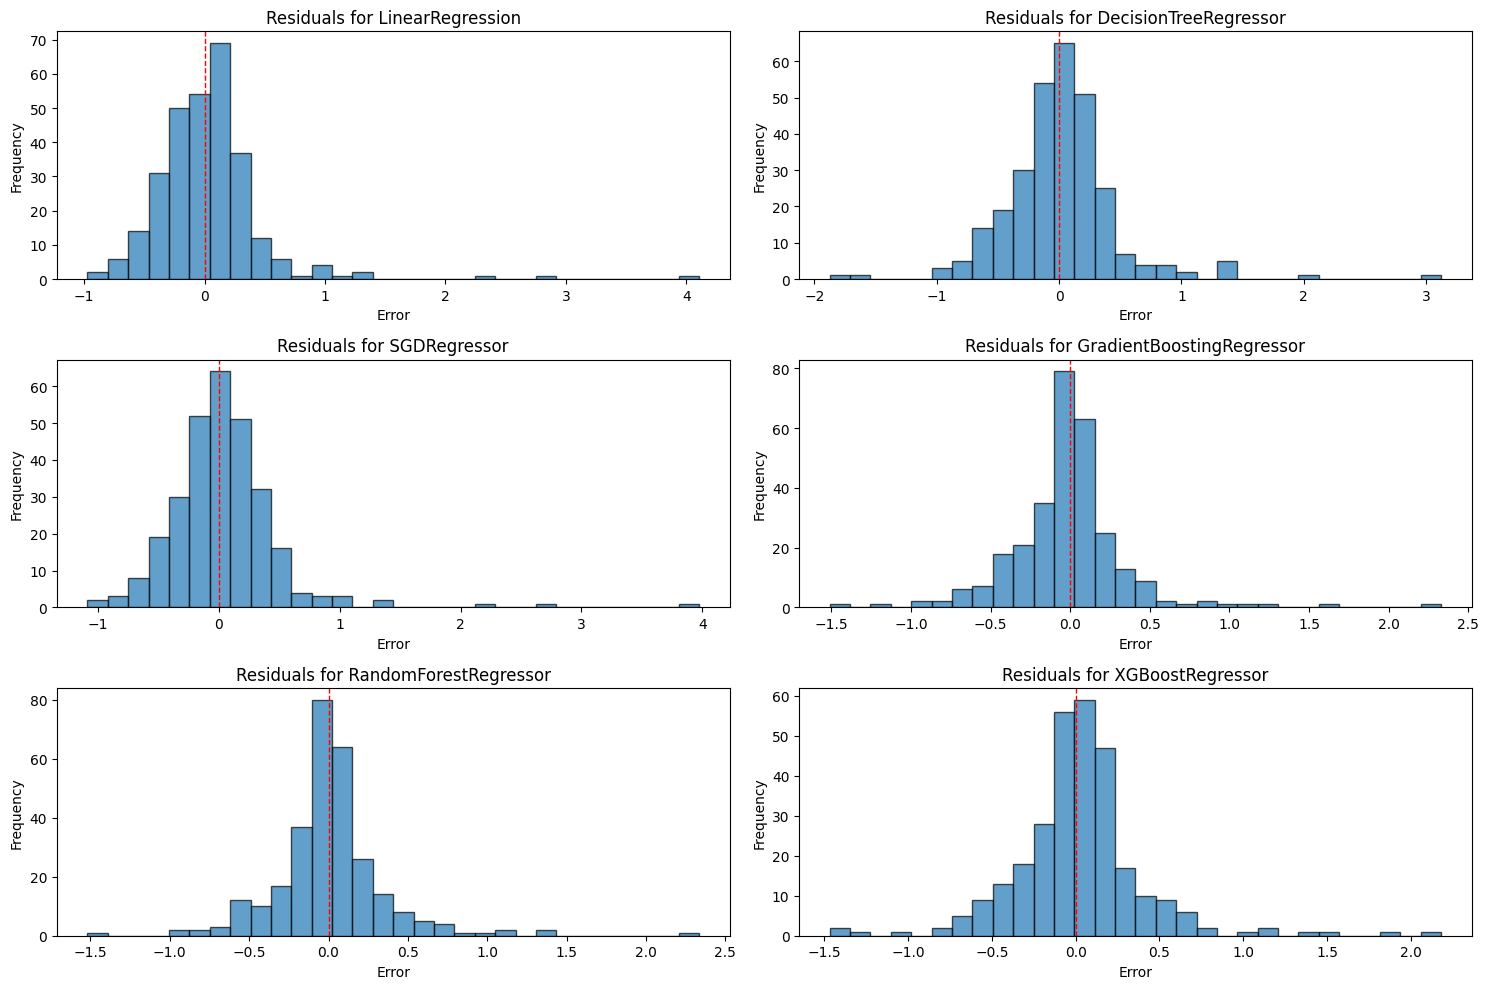

In [ ]:
# Set up the plotting area for histograms of residuals for each model with a red line at 0
plt.figure(figsize=(15, 10))

for i, (model_name, model) in enumerate([
    ("LinearRegression", linear_model),
    ("DecisionTreeRegressor", decision_tree_model),
    ("SGDRegressor", sgd_model),
    ("GradientBoostingRegressor", gradient_boosting_model),
    ("RandomForestRegressor", random_forest_model),
    ("XGBoostRegressor", xgboost_model)
], start=1):
    # Calculate residuals (errors) for each model on the test set
    predictions = model.predict(X_test)
    residuals = y_test - predictions

    # Plot histogram of residuals
    plt.subplot(3, 2, i)
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.axvline(0, color='red', linestyle='--', linewidth=1)  # Add red line at 0
    plt.title(f'Residuals for {model_name}')
    plt.xlabel('Error')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The histograms of residuals (errors) for each model, with a red line at zero, allow us to assess the distribution of errors and any bias in predictions. Here’s an interpretation of each model’s residuals:

**Linear Regression:**

The residuals are roughly symmetrically distributed around zero, with a slight right tail.
However, there are a few large positive outliers, indicating that some high values are underpredicted.
Overall, a fairly balanced distribution, though slightly skewed.

**Decision Tree Regressor:**

Residuals are more skewed, with most errors clustered to the left of zero. This suggests that the model is slightly biased toward overestimating the target values.
There are fewer errors close to zero compared to other models, indicating that the Decision Tree may not capture the data's overall trend as well.

**SGD Regressor:**

Similar to Linear Regression, the residuals are mostly centered around zero but with a slight positive skew.
This indicates reasonably balanced predictions, though there are a few large positive errors, meaning it sometimes underpredicts high values.

**Gradient Boosting Regressor:**

The residuals are tightly clustered around zero, with fewer extreme outliers compared to other models.
This tight distribution indicates accurate predictions with minimal bias, which is a strong point for the Gradient Boosting model.
The distribution is quite symmetrical, suggesting balanced predictions.

**Random Forest Regressor:**

The residuals are also mostly centered around zero, with a fairly symmetrical distribution.
Like Gradient Boosting, Random Forest exhibits fewer outliers, and the majority of errors are close to zero.
This suggests that Random Forest provides balanced and accurate predictions.

**XGBoost Regressor:**

The residuals for XGBoost are also tightly centered around zero, similar to Gradient Boosting and Random Forest.
This model has a symmetrical distribution, with minimal large errors, indicating that XGBoost captures the target variable well without significant bias.

**Summary**
Best Models: Gradient Boosting, Random Forest, and XGBoost have the most tightly clustered residuals around zero, indicating high accuracy and minimal bias. They are likely the best models for this dataset.
Underperforming Model: The Decision Tree shows more skew and fewer residuals close to zero, suggesting that it may not generalize as well.
In conclusion, Gradient Boosting Regressor, Random Forest Regressor, and XGBoost Regressor are the top performers, with residual distributions that indicate strong and balanced predictions.

# 13. To further improve model performance, we can apply techniques like:

**Hyperparameter Tuning with Grid Search:**

This involves systematically searching through a specified set of hyperparameters to find the optimal combination for each model.

**Optimizing Preprocessing:**

Using a more tailored preprocessing pipeline, adjusting encoding schemes, and exploring additional feature engineering techniques.
I’ll demonstrate how to set up a pipeline with Grid Search to fine-tune hyperparameters for one of our best models, like Gradient Boosting Regressor or Random Forest Regressor. This pipeline will include preprocessing steps (e.g., scaling and encoding) and will search for the best combination of parameters.

Let’s proceed with setting up this advanced pipeline and grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the preprocessing for numerical and categorical data
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(exclude=['float64', 'int64']).columns

# Define the column transformer with scaling for numerical features and one-hot encoding for categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Initialize the model within a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the grid search to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

best_params, best_score


Fitting 5 folds for each of 108 candidates, totalling 540 fits


({'model__max_depth': None,
  'model__min_samples_leaf': 1,
  'model__min_samples_split': 2,
  'model__n_estimators': 200},
 0.387825922565871)

In [ ]:
# Use the optimized Random Forest model with the best hyperparameters to make predictions on the test set
# Set up the best model in a pipeline with the chosen parameters

# Updating the pipeline with the best hyperparameters
best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=2,
        random_state=42
    ))
])

# Fit the optimized model on the training data
best_pipeline.fit(X_train, y_train)

# Make predictions on the test set
optimized_predictions = best_pipeline.predict(X_test)

# Evaluate the optimized model using test set metrics
mae_optimized = mean_absolute_error(y_test, optimized_predictions)
mse_optimized = mean_squared_error(y_test, optimized_predictions)
rmse_optimized = np.sqrt(mse_optimized)
r2_optimized = r2_score(y_test, optimized_predictions)

mae_optimized, mse_optimized, rmse_optimized, r2_optimized


(0.22728158219872865,
 0.1294779649024017,
 0.3598304668901755,
 0.8935390583081622)